In [2]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [3]:
# reading dataset
df = pd.read_csv("edited_resale_flat_prices.csv").dropna() 
df.head()

,town,street_name,block,storey_range,flat_model,flat_type,floor_area_sqm,lease_commence_date,age,Date,year,month,day,quarter,RPI,resale_price,real_price
0,ANG MO KIO,ANG MO KIO AVE 1,309,10 TO 15,IMPROVED,1 ROOM,31.0,1977,13,1990-01-01,1990,1,1,1990-Q1,4.115226,9000.0,37037.037037
1,ANG MO KIO,ANG MO KIO AVE 1,309,01 TO 06,IMPROVED,1 ROOM,31.0,1977,13,1990-01-01,1990,1,1,1990-Q1,4.115226,6000.0,24691.358025
2,ANG MO KIO,ANG MO KIO AVE 1,309,10 TO 15,IMPROVED,1 ROOM,31.0,1977,13,1990-01-01,1990,1,1,1990-Q1,4.115226,8000.0,32921.810700
3,ANG MO KIO,ANG MO KIO AVE 1,309,06 TO 10,IMPROVED,1 ROOM,31.0,1977,13,1990-01-01,1990,1,1,1990-Q1,4.115226,6000.0,24691.358025
4,ANG MO KIO,ANG MO KIO AVE 1,216,01 TO 06,NEW GENERATION,3 ROOM,73.0,1976,14,1990-01-01,1990,1,1,1990-Q1,4.115226,47200.0,194238.683128


In [4]:
# encoding all the columns that are categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['town'] = le.fit_transform(df['town'])
df['flat_type'] = le.fit_transform(df['flat_type'])
df['storey_range'] = le.fit_transform(df['storey_range'])
df['flat_model'] = le.fit_transform(df['flat_model'])
df.head()

,town,street_name,block,storey_range,flat_model,flat_type,floor_area_sqm,lease_commence_date,age,Date,year,month,day,quarter,RPI,resale_price,real_price
0,0,ANG MO KIO AVE 1,309,2,3,0,31.0,1977,13,1990-01-01,1990,1,1,1990-Q1,4.115226,9000.0,37037.037037
1,0,ANG MO KIO AVE 1,309,0,3,0,31.0,1977,13,1990-01-01,1990,1,1,1990-Q1,4.115226,6000.0,24691.358025
2,0,ANG MO KIO AVE 1,309,2,3,0,31.0,1977,13,1990-01-01,1990,1,1,1990-Q1,4.115226,8000.0,32921.810700
3,0,ANG MO KIO AVE 1,309,1,3,0,31.0,1977,13,1990-01-01,1990,1,1,1990-Q1,4.115226,6000.0,24691.358025
4,0,ANG MO KIO AVE 1,216,0,10,2,73.0,1976,14,1990-01-01,1990,1,1,1990-Q1,4.115226,47200.0,194238.683128


In [5]:
# looking at the correlations of all the variable against the real price
df.corr()['real_price'].sort_values()

age                   -0.360448
flat_model            -0.358413
RPI                   -0.050356
month                  0.002756
year                   0.022973
town                   0.039880
storey_range           0.176480
lease_commence_date    0.396582
resale_price           0.695847
flat_type              0.831137
floor_area_sqm         0.840277
real_price             1.000000
day                         NaN
Name: real_price, dtype: float64

In [6]:
# selecting the significant variables 
x = df[['town', 'storey_range', 'flat_type', 'flat_model', 'floor_area_sqm', 'lease_commence_date', 'age']]
y = df[['real_price']]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

# features scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

In [8]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

r_square = model.score(x_test, y_test)

print(r_square)

0.7381047870370855


In [9]:
model = Ridge(alpha = 0.5)
model.fit(x_train, y_train)

r_square = model.score(x_test, y_test)

print(r_square)

0.738104789284957


In [10]:
model = Lasso(alpha = 0.5)
model.fit(x_train, y_train)

r_square = model.score(x_test, y_test)

print(r_square)

0.4604541229790379


In [11]:
model = ElasticNet(alpha = 0.5)
model.fit(x_train, y_train)

r_square = model.score(x_test, y_test)

print(r_square)

0.6125325504675668


In [12]:
# fitting decision tree regression to the dataset
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
model.fit(x_train, y_train)

r_square = model.score(x_test, y_test)

print(r_square)

0.9421919598622474


In [16]:
# fitting random tree regression to the dataset
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators = 20, random_state = 0)
model.fit(x_train, y_train)

r_square = model.score(x_test, y_test)

print(r_square)

/Users/jiaer/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7848033388213334


In [17]:
# fitting random tree regression to the dataset
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 20, random_state = 0)
model.fit(x_train, y_train)

r_square = model.score(x_test, y_test)

print(r_square)

/Users/jiaer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9513592825526954


Random Forest Regression will be the best model for this dataset.

In [22]:
# two-fold cross-validation using mean squared error
from sklearn.metrics import mean_squared_error

y2_model = model.fit(x_train, y_train).predict(x_test)
y1_model = model.fit(x_test, y_test).predict(x_train)
mean_squared_error(y_train, y1_model), mean_squared_error(y_test, y2_model)

/Users/jiaer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/Users/jiaer/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


(0.06211756263826857, 0.04841802998434282)

In [21]:
# five fold cross_validation using r-square
from sklearn.model_selection import cross_val_score
cross_val_score(model, x, y, cv=5)

/Users/jiaer/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jiaer/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jiaer/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/jiaer/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:516: DataConvers

array([0.87510411, 0.9625002 , 0.93395602, 0.89786654, 0.79440534])

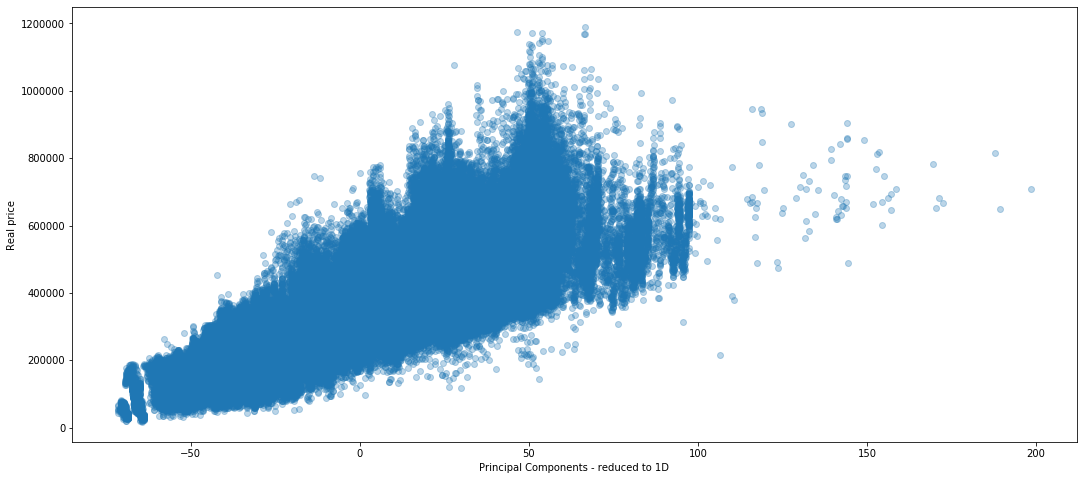

In [29]:
# So why is it the case that linear model is not suitable?
from sklearn.decomposition import PCA

pca = PCA(n_components = 1)
new_x = pca.fit_transform(x)

fig, ax = plt.subplots(figsize = (18,8))
ax.scatter(new_x, y, alpha = 0.3)
ax.set_xlabel("Principal Components - reduced to 1D")
ax.set_ylabel("Real price")

plt.show()

The dataset is so sparse that we cannot use linear model. -> use Decision Trees, specifically Random Forest instead.

In [ ]:
# Store the final model :
import pickle

df = pd.read_csv("edited_resale_flat_prices.csv").dropna() 
model = RandomForestRegressor(n_estimators = 20, random_state = 0)

le = LabelEncoder()
df['town'] = le.fit_transform(df['town'])
df['flat_type'] = le.fit_transform(df['flat_type'])
df['storey_range'] = le.fit_transform(df['storey_range'])
df['flat_model'] = le.fit_transform(df['flat_model'])

x = df[['town', 'storey_range', 'flat_type', 'flat_model', 'floor_area_sqm', 'lease_commence_date', 'age']]
y = df[['real_price']]

model.fit(x, y.values.reshape(-1,))

pickle.dump(model, open('model1.h5','wb'))

In [ ]:
# Load the final model
model = pickle.load(open('model1.h5','rb'))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

print(model.score(x_test, y_test))